Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('baseball.csv')

In [3]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Data Visualization

<AxesSubplot:>

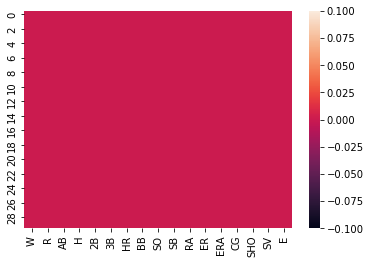

In [5]:
#checking the heatmap for null values
sns.heatmap(df.isnull())

In [6]:
#heatmap shows that there is no null value

# Correlation between different value

array([[<AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'H'}>],
       [<AxesSubplot:title={'center':'2B'}>,
        <AxesSubplot:title={'center':'3B'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'BB'}>],
       [<AxesSubplot:title={'center':'SO'}>,
        <AxesSubplot:title={'center':'SB'}>,
        <AxesSubplot:title={'center':'RA'}>,
        <AxesSubplot:title={'center':'ER'}>],
       [<AxesSubplot:title={'center':'ERA'}>,
        <AxesSubplot:title={'center':'CG'}>,
        <AxesSubplot:title={'center':'SHO'}>,
        <AxesSubplot:title={'center':'SV'}>],
       [<AxesSubplot:title={'center':'E'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

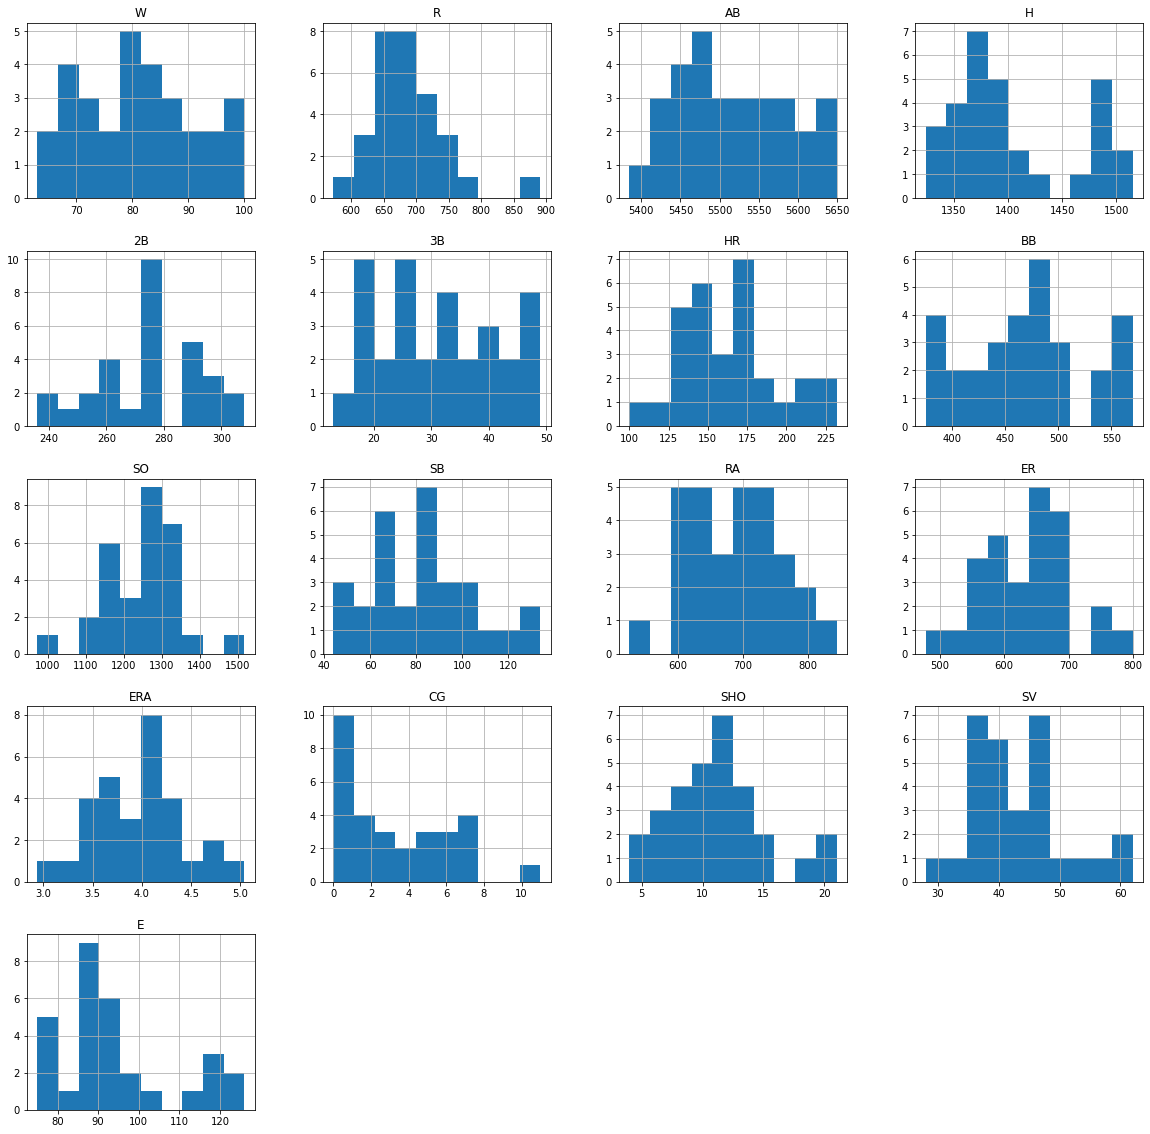

In [8]:
df.hist(figsize=(20,20))

In [9]:
#These graphs shos the all data present in graph form 

In [10]:
col=df.columns
col

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

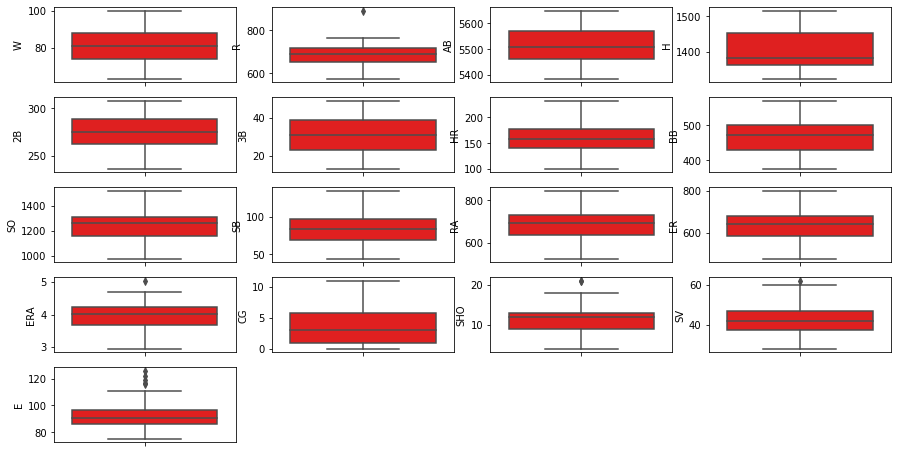

In [13]:
plt.figure(figsize=(15,8))
for i in range(17):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col[i]],color='r')

In [14]:
from scipy.stats import zscore
z=zscore(df)
z

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.506955,-0.539806,-0.814629,1.671607,-0.461470
1,0.197838,0.134432,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.254598,-0.539806,0.172800,0.249879,-0.607197
2,0.003243,-0.332906,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.641347,2.772641,-0.320914,-0.654856,-1.117242
3,-0.483244,-1.146419,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.053010,1.300442,-0.567771,-0.784104,0.485758
4,-0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,-1.042600,-0.607197
5,1.170814,3.509647,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.350165,1.300442,-0.320914,-1.171848,-0.461470
6,0.587028,1.311430,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.165003,-0.171757,-1.802057,0.637623,-0.097152
7,0.003243,0.428681,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.209800,-1.275906,-0.320914,-0.008617,-1.262970
8,-0.094054,-0.765626,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.484557,-0.907856,0.172800,2.188598,0.048576
9,-0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.792164,-0.171757,-0.320914,-0.396360,0.194303


In [15]:

dsn = df[(z < 3).all(axis=1)]

In [16]:
dsn.shape

(29, 17)

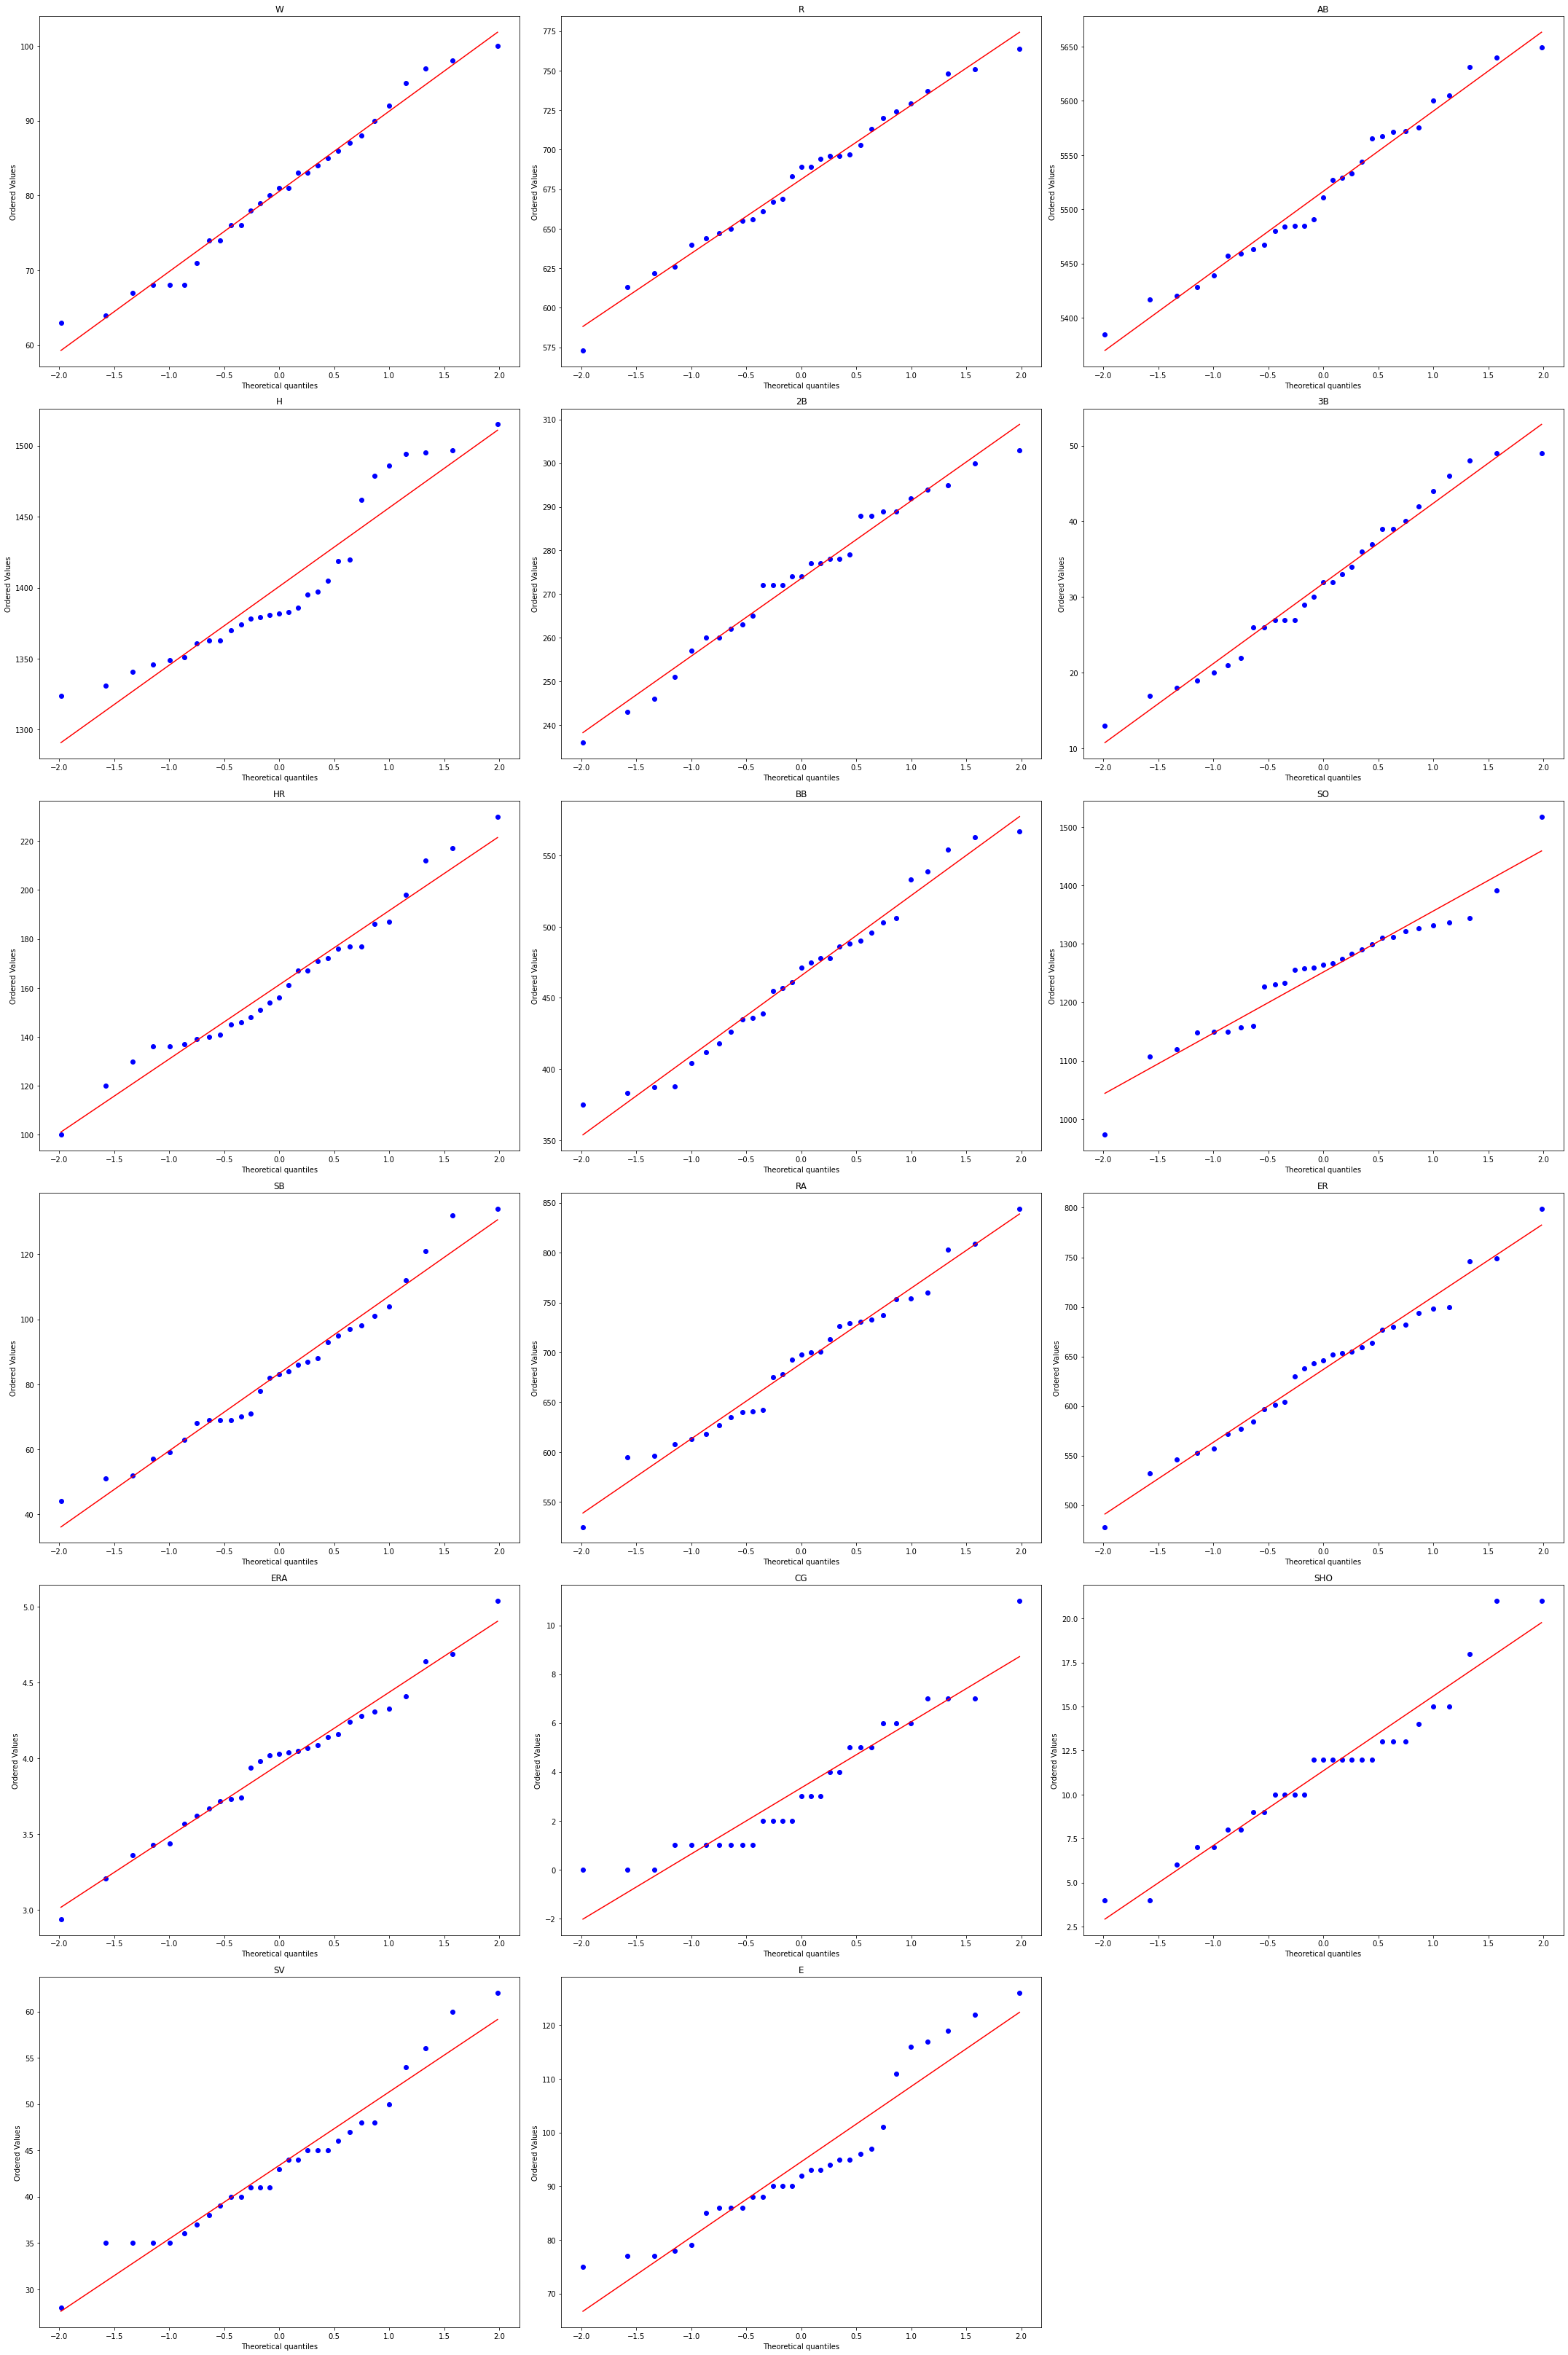

In [17]:
from scipy.stats import probplot
plt.figure(figsize=(30,45))
for i in range(17):
    plt.subplot(6,3,i+1)
    probplot(dsn[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

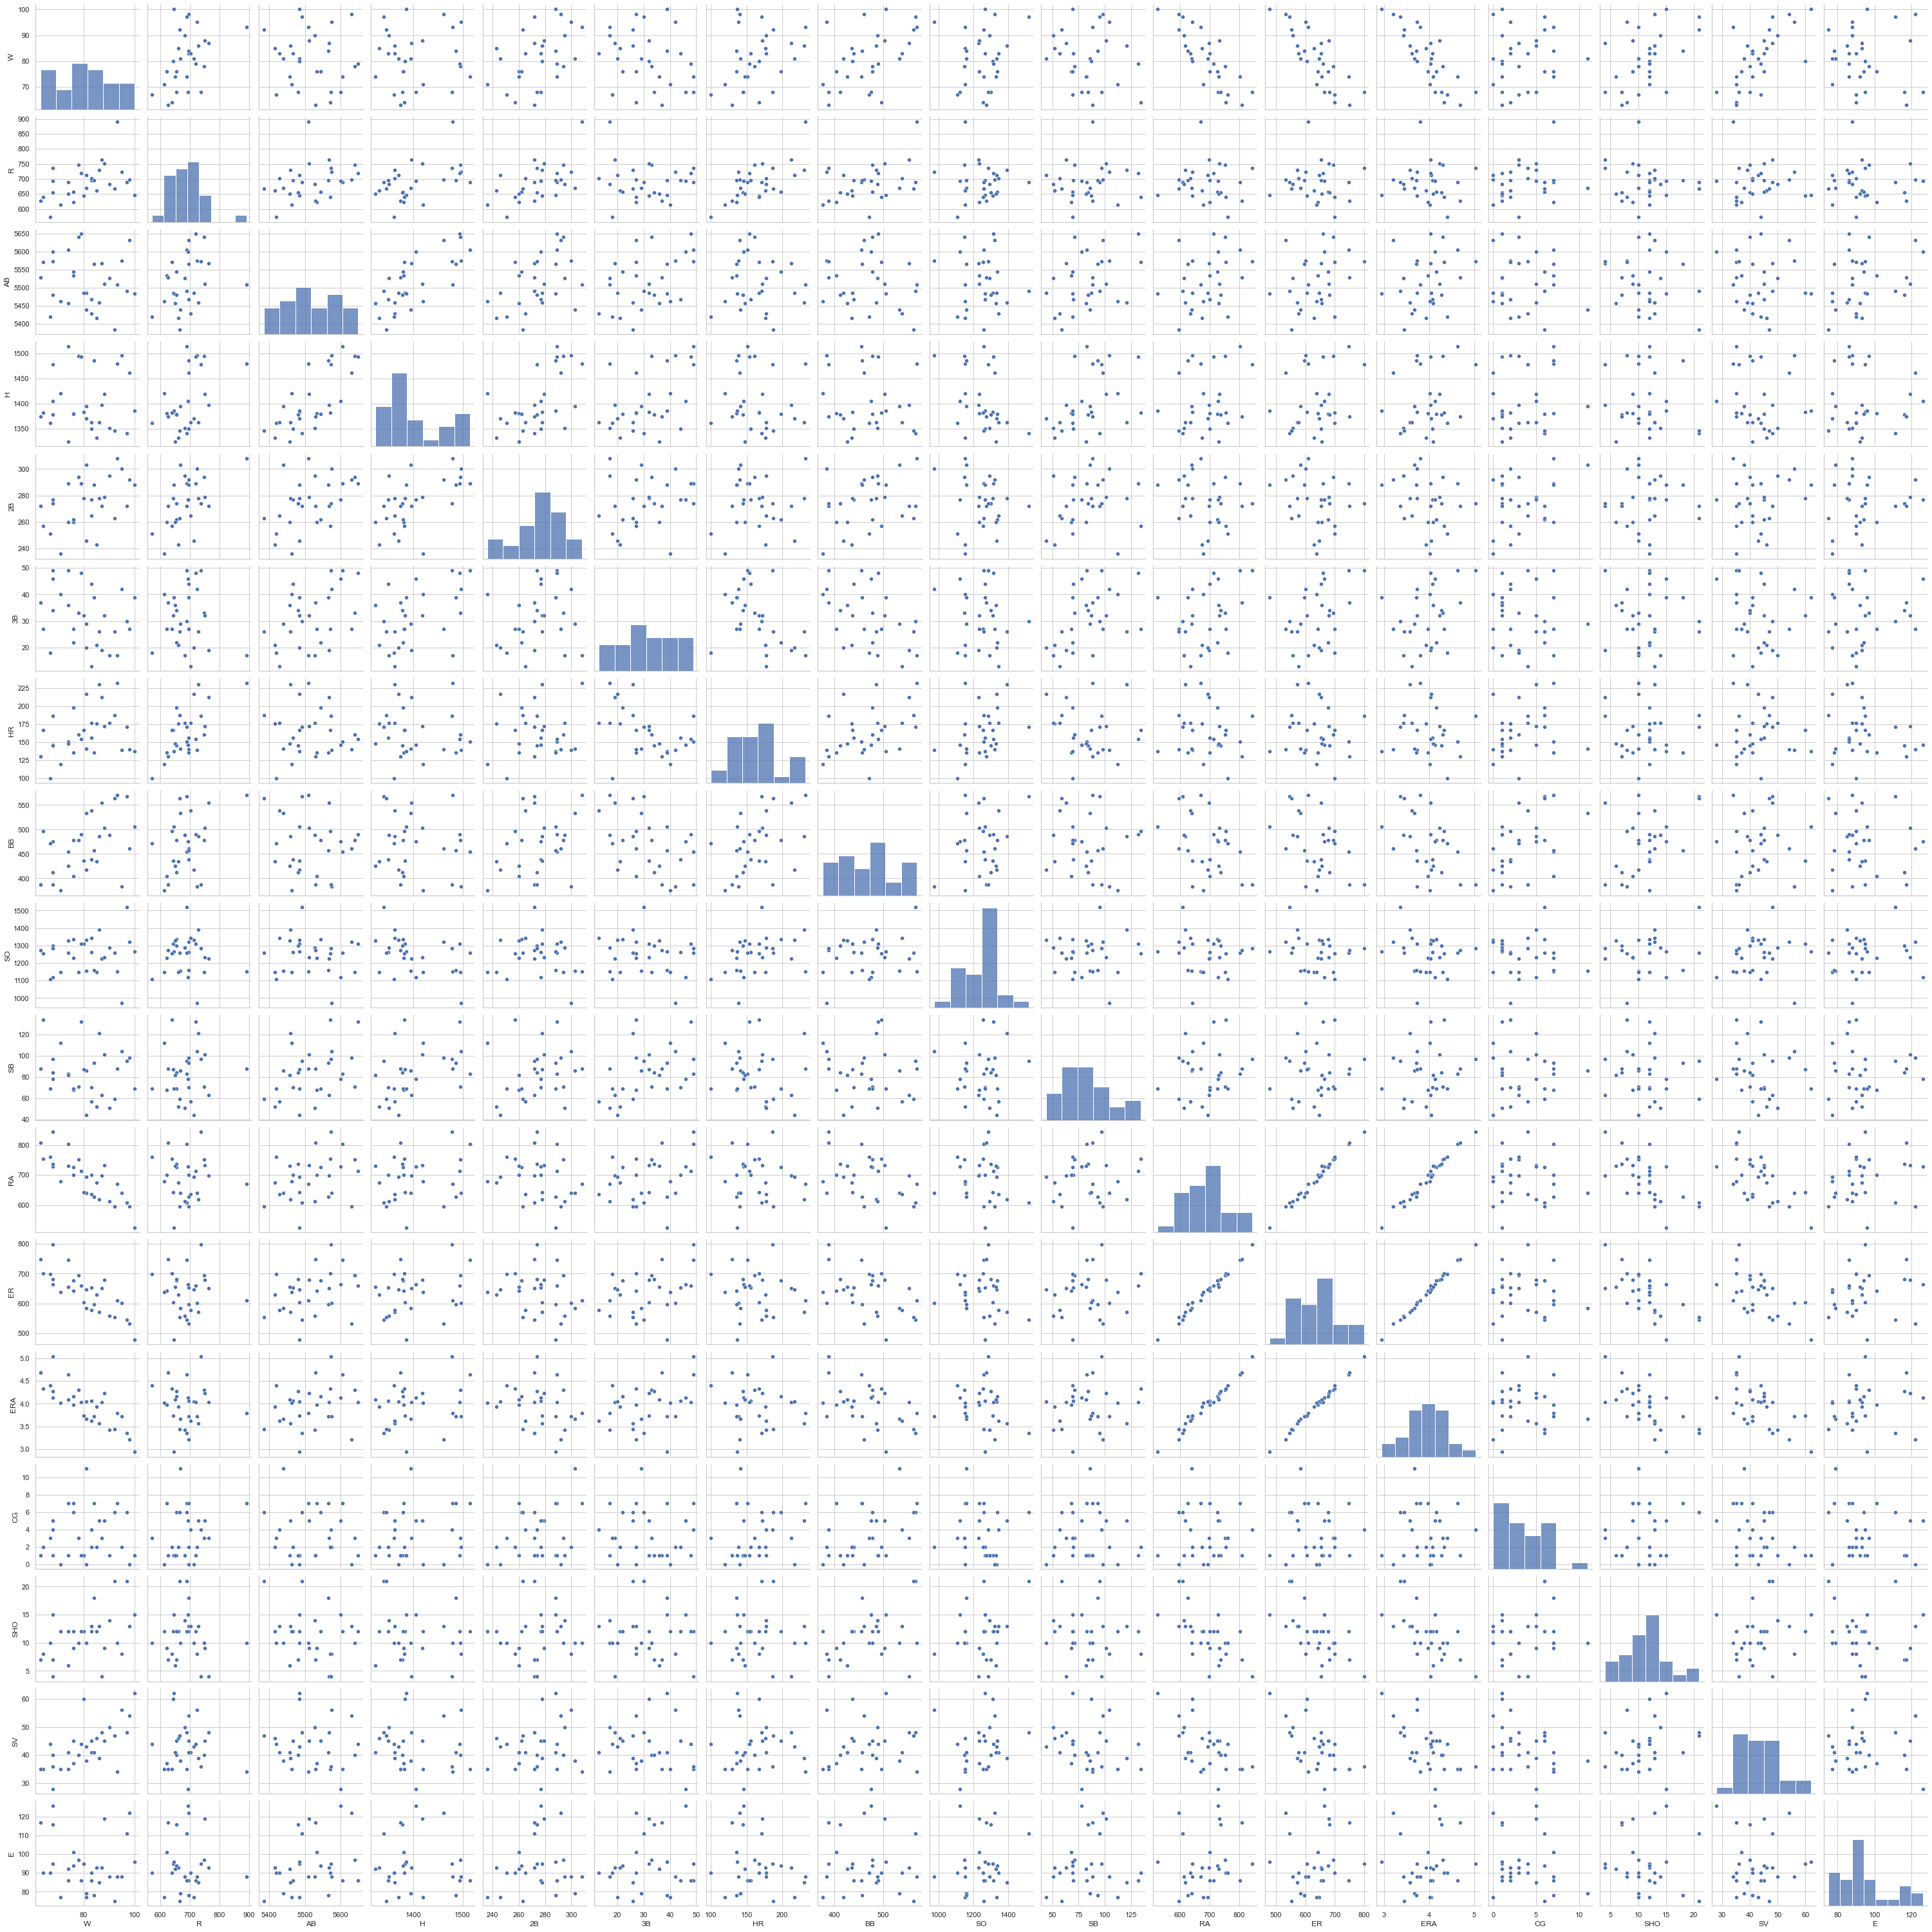

In [30]:
# get the pairplot of the features:
sns.pairplot(df,)

SKEWNESS 

In [18]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

<AxesSubplot:>

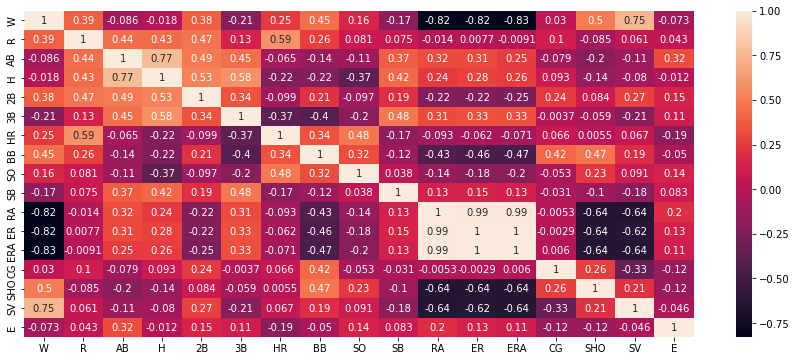

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(dsn.corr(),annot=True)

<AxesSubplot:xlabel='R', ylabel='W'>

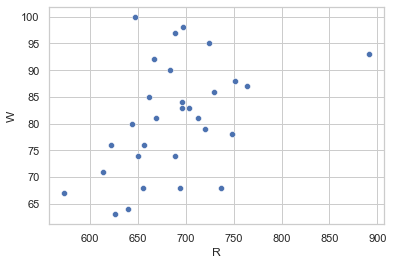

In [32]:
# Wins vs runs
sns.scatterplot(df.R,df.W)

In [50]:
np.log(df+1).skew()


Wins                       -0.165050
Runs                        0.744813
At_Bats                     0.161062
Hits                        0.628584
Doubles                    -0.375085
Triples                    -0.418009
Homeruns                   -0.009528
Walks                      -0.051289
Strikeouts                 -0.540637
Stolen_Bases               -0.160463
Runs_Allowed               -0.241950
Earned_Runs                -0.278793
Earned_Run_Average_(ERA)   -0.243088
Complete_Game              -0.325962
Shutouts                   -0.589640
Saves                       0.163057
Errors                      0.632916
dtype: float64

In [51]:
# therfore;
df_cleaned = np.log(df + 1)

<AxesSubplot:>

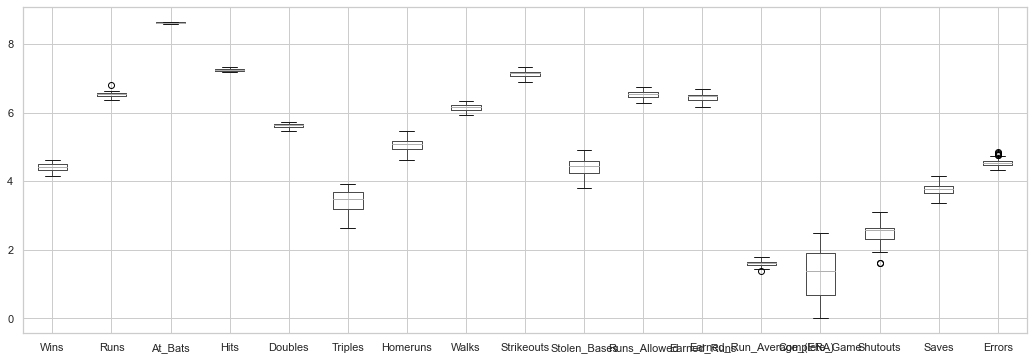

In [52]:
# let's do a complete dataset box plot with the transformed data.
plt.figure(figsize=(18,6))
df_cleaned.boxplot()

# Model

In [53]:
#we will use clean dataset for model
df_cleaned

,Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors
0,4.564348,6.586172,8.626227,7.311886,5.707110,3.761200,4.941642,5.950643,6.881411,4.653960,6.464588,6.400257,1.553925,1.098612,2.197225,4.043051,4.488636
1,4.430817,6.546785,8.606668,7.207860,5.627621,3.806662,5.056246,6.086775,7.142827,4.262680,6.552508,6.483107,1.623341,1.098612,2.564949,3.828641,4.465908
2,4.406719,6.507278,8.601534,7.241366,5.717028,3.401197,4.955827,6.280396,7.054450,4.465908,6.463029,6.371612,1.541159,2.484907,2.397895,3.663562,4.382027
3,4.343805,6.434547,8.618666,7.231287,5.564520,3.332205,4.919981,6.003887,7.116394,4.234107,6.553933,6.467699,1.605430,2.079442,2.302585,3.637586,4.624973
4,4.317488,6.536692,8.631593,7.323831,5.669881,3.912023,5.023881,6.122493,7.138867,4.430817,6.689599,6.616065,1.729884,2.079442,2.564949,3.583519,4.465908
5,4.543295,6.793466,8.614320,7.300473,5.733341,2.890372,5.451038,6.347389,7.049255,4.488636,6.508769,6.413459,1.568616,2.079442,2.397895,3.555348,4.488636
6,4.477337,6.639876,8.624791,7.242798,5.609472,2.995732,5.361292,6.318968,7.113142,4.158883,6.549651,6.481577,1.615420,1.386294,1.609438,3.891820,4.543295
7,4.406719,6.570883,8.609955,7.223296,5.509388,3.044522,5.384495,6.037871,7.194437,3.806662,6.542472,6.472346,1.619388,0.000000,2.397895,3.784190,4.356709
8,4.394449,6.469250,8.609955,7.232733,5.631212,3.496508,5.123964,6.079933,7.178545,4.477337,6.466145,6.405228,1.556037,0.693147,2.564949,4.110874,4.564348
9,4.369448,6.618739,8.637817,7.310550,5.686975,3.526361,5.087596,6.171701,7.046647,4.276666,6.625392,6.543912,1.669592,1.386294,2.397895,3.713572,4.584967


In [54]:
df.columns = 'Wins,Runs,At_Bats,Hits,Doubles,Triples,Homeruns,Walks,Strikeouts,Stolen_Bases,Runs_Allowed,Earned_Runs,Earned_Run_Average_(ERA),Complete_Game,Shutouts,Saves,Errors'.split(',')


In [55]:
# near perfectly correlated feaatures:
df_cleaned.drop(['Runs_Allowed','Earned_Runs'],1,inplace=True)

In [56]:
#splitting the features and target variables
X = df_cleaned.drop('Wins',1)
y = df_cleaned['Wins']

In [57]:
#shape
X.shape,y.shape

((30, 14), (30,))

In [58]:
# train _test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.22,random_state = 42)

In [59]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((23, 14), (23,), (7, 14), (7,))

In [60]:
# applying standard scaling to the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [61]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [62]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [63]:
# let's create a helper function to give us the r2 score and mse score in return

In [64]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))  

In [65]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 0.0022433324528189475
R2_Score 0.869333255437271


In [66]:
# try2: Ridge Regression
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 0.002244541318883304
R2_Score 0.8692628429609377


In [67]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 0.0022606984729817555
R2_Score 0.8683217418215189


In [68]:
# ElasticNet
train_n_ret_scores(ElasticNet(alpha=0.0001))

MSE: 0.0022694205406136466
R2_Score 0.8678137100396566


In [69]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear',C=10,gamma=0.001))

MSE: 0.005901364125097321
R2_Score 0.6562649295530079


In [70]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.010225938213359638
R2_Score 0.40437269796535447


In [71]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=500))

MSE: 0.007113423438720626
R2_Score 0.5856664569418353


In [72]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.004481381458449643
R2_Score 0.7389742543136788


In [73]:
# try3: Adaboost
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

MSE: 0.0041763806649243165
R2_Score 0.756739548409489


In [74]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),ElasticNet(alpha=0.0001),SVR(kernel='linear'),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso ElasticNet SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)

LinearRegression()
Ridge(alpha=0.001)
Lasso(alpha=0.0003)
ElasticNet(alpha=0.0001)
SVR(kernel='linear')
DecisionTreeRegressor()
RandomForestRegressor()
GradientBoostingRegressor()
AdaBoostRegressor(base_estimator=LinearRegression())


In [75]:
models_df

,Model,MSE,R2,meanCV
0,Linear,0.002243,0.869333,0.497937
1,Ridge,0.002245,0.869263,0.560001
2,Lasso,0.002373,0.861766,0.611066
3,ElasticNet,0.002269,0.867814,0.589938
4,SVR,0.005901,0.656265,-0.234918
5,Descision_Tree,0.011370,0.337711,-2.543829
6,Random_Forest,0.007898,0.539968,-1.010415
7,Gradient_Boost,0.004419,0.742596,-1.271015
8,Ada_Boost,0.002984,0.826220,0.513211


The Lasso model is outperforming Linear by around 1 percent
We can see that the Ensemble Methods are doing bad on this model as one of the main reason for that is Very Less Data and Too Many Features wrt to the number of samples

In [76]:
# Best model

best_model = Lasso(alpha=0.001)
best_model.fit(X_train,y_train)

Lasso(alpha=0.001)

In [77]:
train_n_ret_scores(Lasso(alpha=0.0001,))

MSE: 0.0022856579859010227
R2_Score 0.8668679322022921


In [78]:
np.mean(cross_val_score(best_model,X,y))

0.5791466844384743

We are getting around 60 percent of accracy on cross_validation with 'r2' metric

In [79]:
# SAVING THE BEST MODEL:
import joblib
joblib.dump(best_model,'BaseBall.pkl')

['BaseBall.pkl']